In [1]:
import pickle
import os
import matplotlib.pyplot as plt
os.chdir("..")

In [2]:
os.getcwd()

'C:\\Users\\Dongmin Kim\\Documents\\DeepTSAD'

## Load

In [3]:
from data.load_data import DataFactory

In [4]:
datafactory = DataFactory()

In [5]:
train_X, train_y, test_X, test_y = datafactory.load_MSL()

Reading MSL...
train: X - (58317, 55), y - (58317,)
test: X - (73729, 55), y - (73729,)
Loading complete.


## Stats

In [6]:
import numpy as np

In [7]:
print("=== statistics ===")
train_len, F = train_X.shape
test_len, _ = test_X.shape
anomaly_count = np.count_nonzero(test_y)
print(f"[Train] total: {train_len}, num_features: {F}")
print(f"[Test] total: {test_len}, anomaly / total: {anomaly_count}/{len(test_y)} = {anomaly_count/len(test_y):.3f}")

=== statistics ===
[Train] total: 58317, num_features: 55
[Test] total: 73729, anomaly / total: 7766/73729 = 0.105


## Visualize

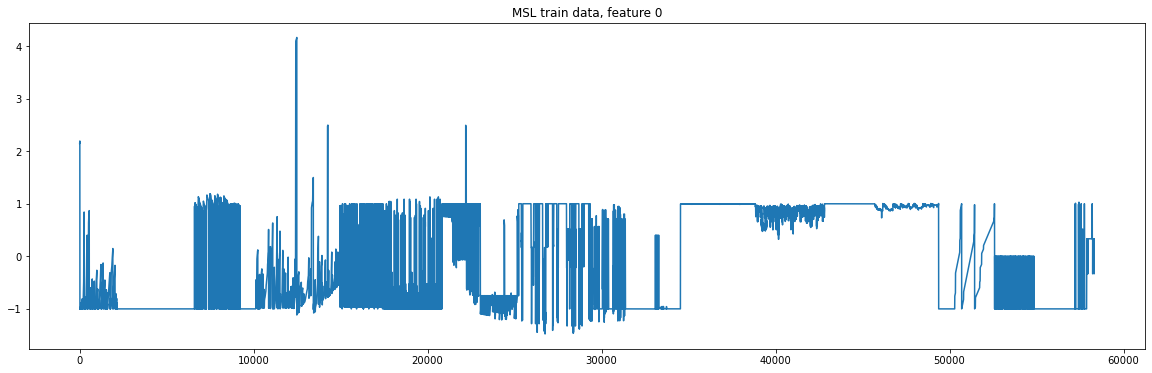

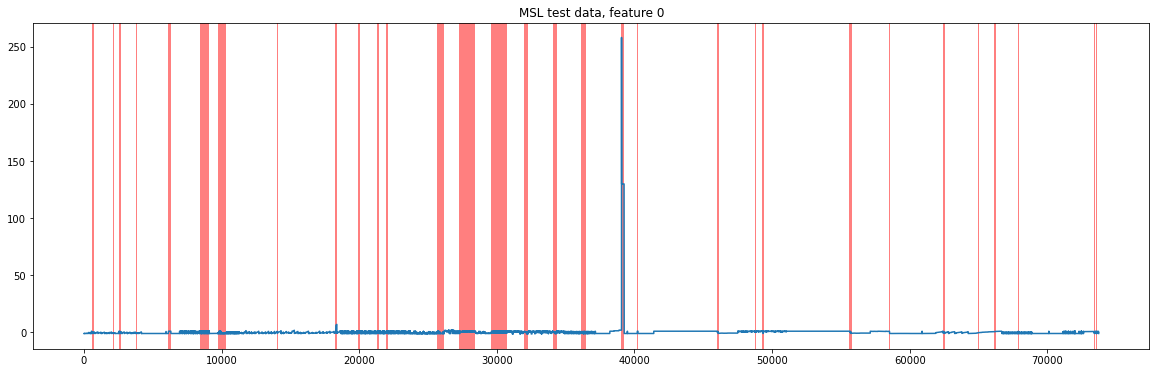

In [8]:
F = 0
dataset = "MSL"
datafactory.visualize_dataset(train_X, train_y, test_X, test_y, dataset_name=dataset, feature_idx=F)